In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn
from scipy.ndimage import laplace

import os
import seaborn as sns
import importlib

In [2]:
import display_results

In [3]:
def set_sns():
    sns.set_theme()
    sns.set_style("darkgrid")
    sns.set(
        rc={
            "axes.axisbelow": True,
            "axes.edgecolor": "black",
            "axes.facecolor": "white",
            "axes.grid": False,
            "axes.labelcolor": "black",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "figure.facecolor": "white",
            "lines.solid_capstyle": "round",
            "patch.edgecolor": "w",
            "patch.force_edgecolor": True,
            "text.color": "black",
            "xtick.bottom": False,
            "xtick.color": "black",
            "xtick.direction": "out",
            "xtick.top": False,
            "ytick.color": "black",
            "ytick.direction": "out",
            "ytick.left": False,
            "ytick.right": False,
            "legend.facecolor": "white",
            "grid.color": "black",
            "grid.linestyle": "--"
        },
    )

## Load data

In [4]:
# Load
df_dim = pd.read_csv('dim_id_residuals_2.csv').drop(columns = 'Unnamed: 0')
df_dim.drop_duplicates('id', inplace = True)
df_dim['penalty'] = df_dim['penalty'].astype(float)

# Treat Peclet
df_dim.loc[df_dim['Peclet_triangle'].isna(), 'Peclet_triangle'] = ''
df_dim['Peclet_triangle'] = df_dim['Peclet_triangle'].apply(lambda a: a.replace('[', '').replace(']', ''))
df_dim.loc[df_dim['Peclet_triangle'] == '', 'Peclet_triangle'] = np.nan
df_dim['Peclet_triangle'] = df_dim['Peclet_triangle'].astype(float)

# Massa balance compute

# Delta None is set as 0
df_dim.loc[df_dim['delta'].isna(), 'delta'] = 0
df_dim.loc[df_dim['delta'] == 0, 'num_diff_flow'] = 0

# Mass balance = diffusion flow + convective flow
df_dim['mass_balance'] = df_dim['diff_flow'] + df_dim['convec_flow']
df_dim['artificial_mass_balance'] = df_dim['diff_flow'] + df_dim['num_diff_flow'] + df_dim['convec_flow']

# Peclet global
df_dim['peclet_global'] = np.abs(df_dim['convec_flow']) / np.abs(df_dim['diff_flow'] + df_dim['num_diff_flow'])

## Plot boundary of model

In [5]:
import build_model

In [6]:
model_convection_diff = build_model.Model("mesh", [1, 3])

In [7]:
importlib.reload(build_model)

<module 'build_model' from 'C:\\Users\\kenjiuj\\OneDrive - Votorantim\\Docs\\KENJI URAZAKI JUNIOR\\UNIPD\\2 Semester\\NCMS\\Project code\\fem_2d_convection_diff\\build_model.py'>

(0, 1)
[[0.  0. ]
 [0.3 0. ]]
(1, 2)
[[0.3 0. ]
 [1.  0. ]]
(2, 3)
[[1. 0.]
 [1. 1.]]
(3, 4)
[[1. 1.]
 [0. 1.]]
(4, 0)
[[0. 1.]
 [0. 0.]]


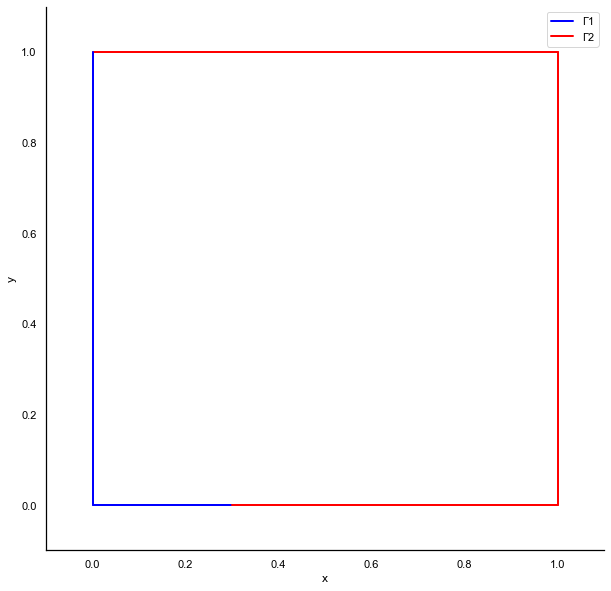

In [8]:
set_sns()
model_convection_diff.plot_boundary()
display_results.save_fig('boundary')

# Residuals
- Penalty and lifting methods

In [5]:
# group the data by 'penalty' and calculate the mean and standard deviation of 'residual_system'
grouped_data = df_dim.groupby('penalty').agg({'residual_system' : ['mean', 'std', 'min','max'],
                                              'residual_bc' : ['mean', 'std', 'min','max']})
grouped_data

residual_system                                     residual_bc  \
                        mean         std        min          max        mean   
penalty                                                                        
1.000000e+00      274.965520  638.817246   9.065097  7558.274379   41.400713   
1.000000e+01       59.222738  393.309867  10.114186  6122.481651    7.162206   
1.000000e+02       23.010915   16.361904  10.168272   156.908792    5.261321   
1.000000e+03       22.721767   15.229308  10.172969   139.554272    5.202474   
1.000000e+04       22.695301   15.131721  10.173188   138.072114    5.196783   
1.000000e+05       22.692417   15.121956  10.173224   137.926244    5.196215   
1.000000e+06       22.692005   15.120886  10.173228   137.911330    5.196159   
1.000000e+07       22.691979   15.120792  10.173228   137.909874    5.196153   
1.000000e+08       22.691976   15.120781  10.173228   137.909728    5.196152   
1.000000e+09       22.691976   15.120780  10.173228   137.909713    5.196152   
1.000000e+10       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+12       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+14       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+30       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+31       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+32       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+33       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+34       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+35       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+36       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+37       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+38       22.691976   15.120780  10.173228   137.909712    5.196152   
1.000000e+39       22.691976   15.120780  10.173228   137.909712    5.196152   

                                                   
                       std       min          max  
penalty                                            
1.000000e+00  1.075161e+02  1.017294  1730.689708  
1.000000e+01  1.466648e+01  5.194716   269.827224  
1.000000e+02  8.573413e-02  5.195986     6.012753  
1.000000e+03  7.809500e-03  5.196136     5.267380  
1.000000e+04  7.742254e-04  5.196151     5.203185  
1.000000e+05  7.735589e-05  5.196152     5.196855  
1.000000e+06  7.735094e-06  5.196152     5.196223  
1.000000e+07  7.736316e-07  5.196152     5.196159  
1.000000e+08  7.753861e-08  5.196152     5.196153  
1.000000e+09  8.184088e-09  5.196152     5.196152  
1.000000e+10  2.344311e-09  5.196152     5.196152  
1.000000e+12  2.156243e-09  5.196152     5.196152  
1.000000e+14  2.155653e-09  5.196152     5.196152  
1.000000e+30  2.155647e-09  5.196152     5.196152  
1.000000e+31  2.155647e-09  5.196152     5.196152  
1.000000e+32  2.155647e-09  5.196152     5.196152  
1.000000e+33  2.155647e-09  5.196152     5.196152  
1.000000e+34  2.155647e-09  5.196152     5.196152  
1.000000e+35  2.155647e-09  5.196152     5.196152  
1.000000e+36  2.155647e-09  5.196152     5.196152  
1.000000e+37  2.155647e-09  5.196152     5.196152  
1.000000e+38  2.155647e-09  5.196152     5.196152  
1.000000e+39  2.155647e-09  5.196152     5.196152

In [103]:
importlib.reload(display_results)

<module 'display_results' from 'C:\\Users\\kenjiuj\\OneDrive - Votorantim\\Docs\\KENJI URAZAKI JUNIOR\\UNIPD\\2 Semester\\NCMS\\Project code\\fem_2d_convection_diff\\display_results.py'>

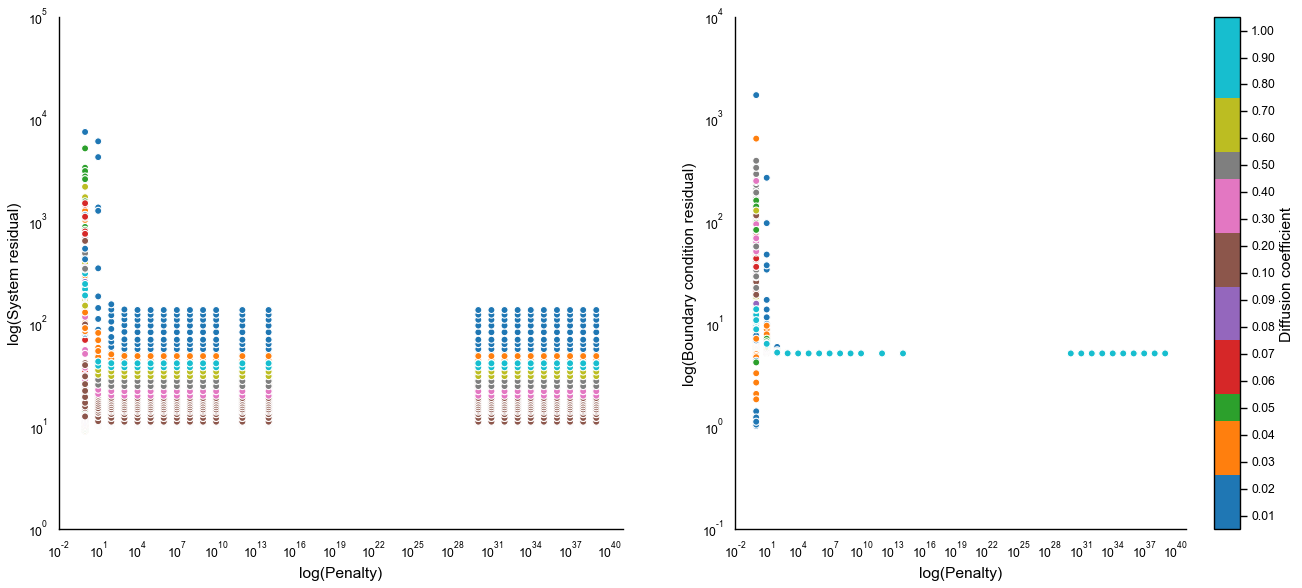

In [104]:
# Plot penalty residuals
set_sns()
display_results.plot_residuals(df_dim[df_dim['method'] == 'penalty'],
                               'penalty', x_scale = ['log', 'log'], y_scale = ['log', 'log'],
                               name = 'total_penalty')

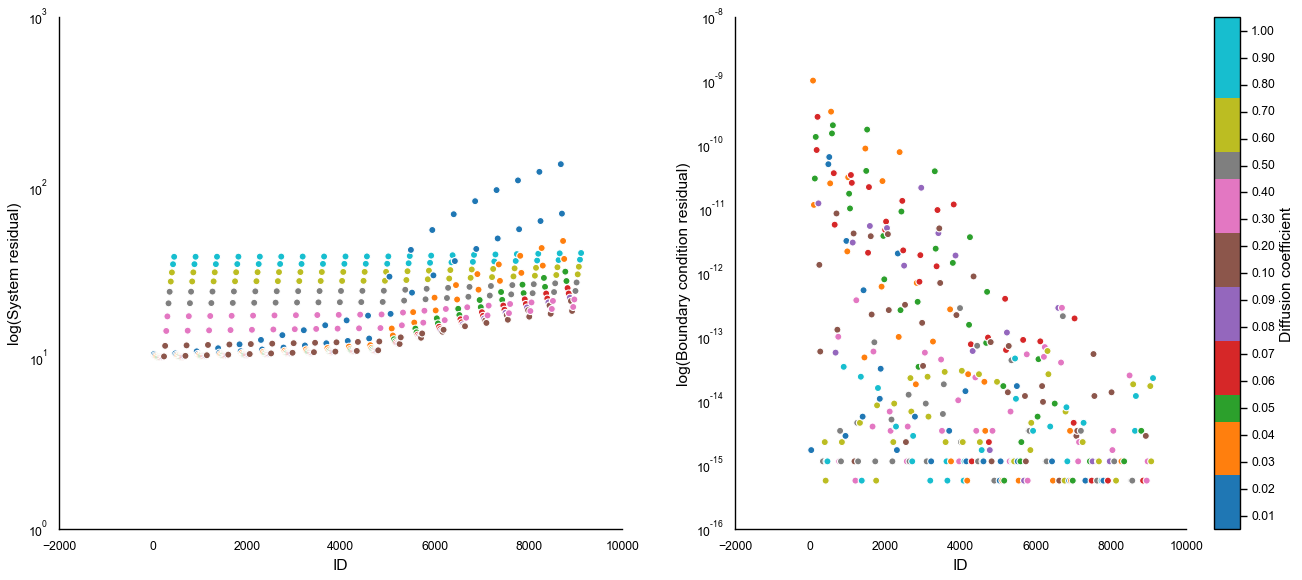

In [105]:
 # Lifting method residuals
set_sns()
display_results.plot_residuals(df_dim, 'lifting', x_scale = ['linear', 'linear'], y_scale = ['log', 'log'], 
                               name = 'lifting', c_color = 'diff')

# Concentration profile analysis

In [8]:
# Concentration saved
df_concentration_all = pd.read_csv('concentrations_id_2.csv').drop(columns = 'Unnamed: 0')

# Triangles
triangles = np.genfromtxt("mesh/mesh.dat", dtype = int)[:, 0:3]

# Nodes
nodes = np.genfromtxt("mesh/xy.dat")

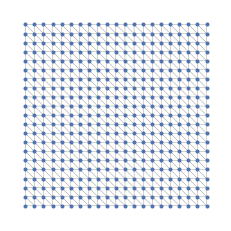

In [9]:
display_results.plot_geometry(nodes, triangles)

## Análise Diffusion coefficient

In [18]:
df_dim[(df_dim['diff'] == 0.01)&(df_dim['delta'] == 0)&(df_dim['method'] == 'lifting')]

,Peclet_triangle,convec_flow,convergence,delta,diff,diff_flow,error,h_max,h_min,id,method,num_diff_flow,penalty,residual_bc,residual_system,velocity_x,velocity_y,mass_balance,artificial_mass_balance,peclet_global
23,NaN,1.27,0,0.0,0.01,-0.228616,0,0.070711,0.070711,23,lifting,0.0,NaN,1.730666e-15,10.630856,1,3,1.041384,1.041384,5.555178


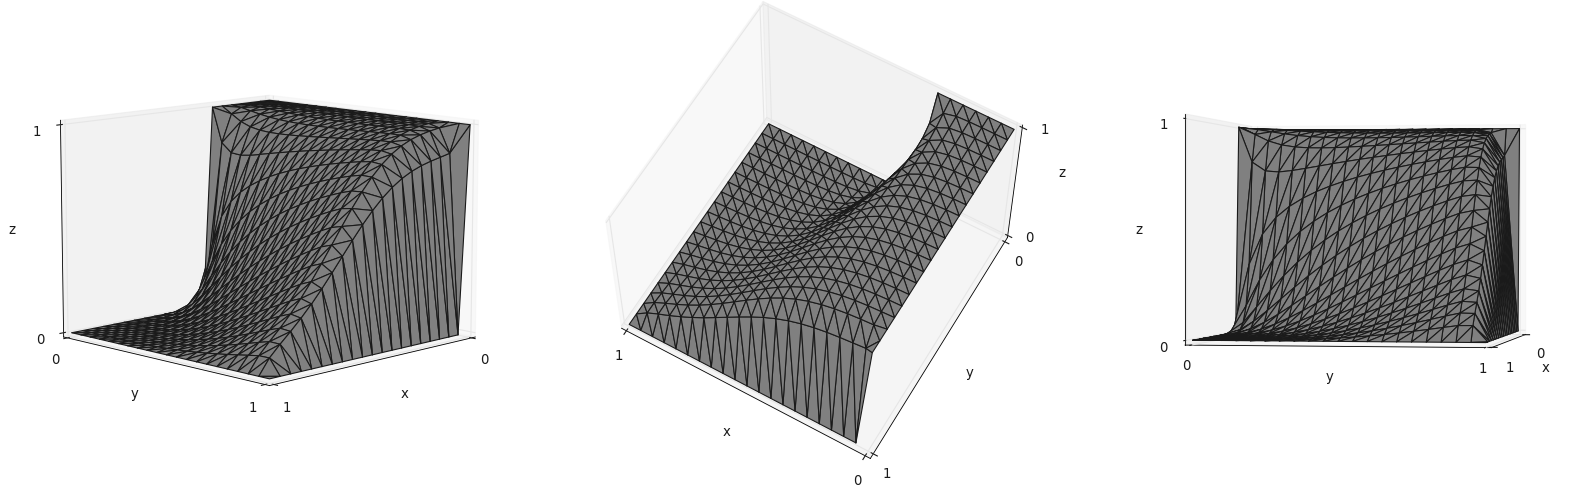

     Peclet_triangle  convec_flow  convergence  delta  diff  diff_flow error  \
239              NaN         1.27            0    0.0   0.1  -1.084883     0   

        h_max     h_min   id   method  num_diff_flow  penalty   residual_bc  \
239  0.070711  0.070711  239  lifting            0.0      NaN  1.356266e-12   

     residual_system  velocity_x  velocity_y  mass_balance  \
239         10.30578           1           3      0.185117   

     artificial_mass_balance  peclet_global  
239                 0.185117       1.170633  


In [12]:
# Display 3D- diff = 0.1; delta = 0
display_results.plot_id(df_concentration_all, nodes, triangles, id = 239)
print(df_dim[(df_dim['id'] == 239)])

Total absolute derivatives: 30.93093812584631
Mean absolute derivatives: 0.07013818169126147


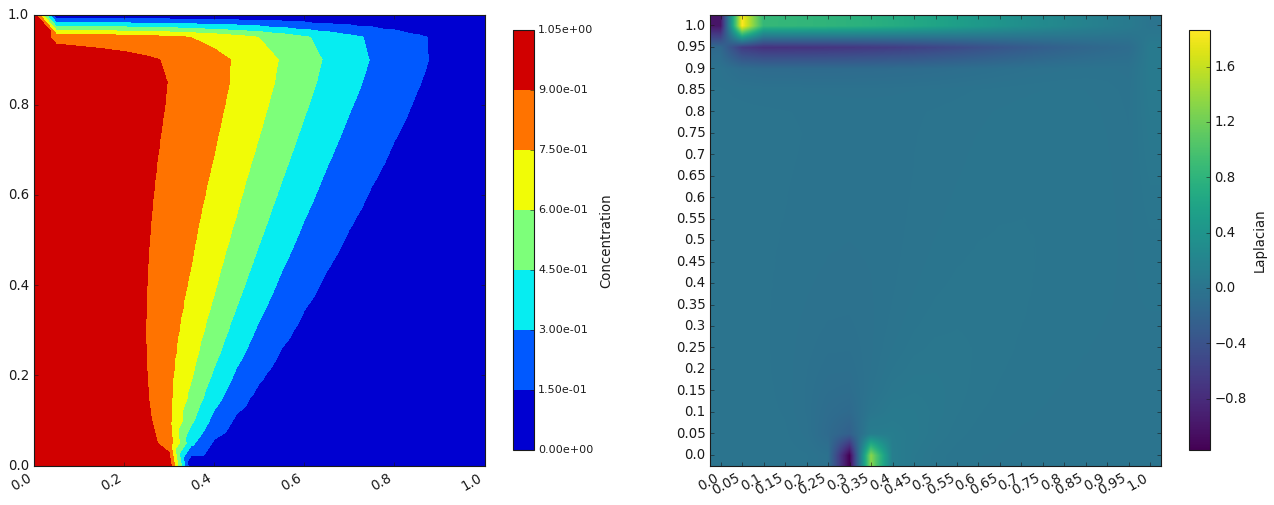

In [14]:
display_results.plot_idprofile(df_concentration_all, nodes, triangles, id = 239)

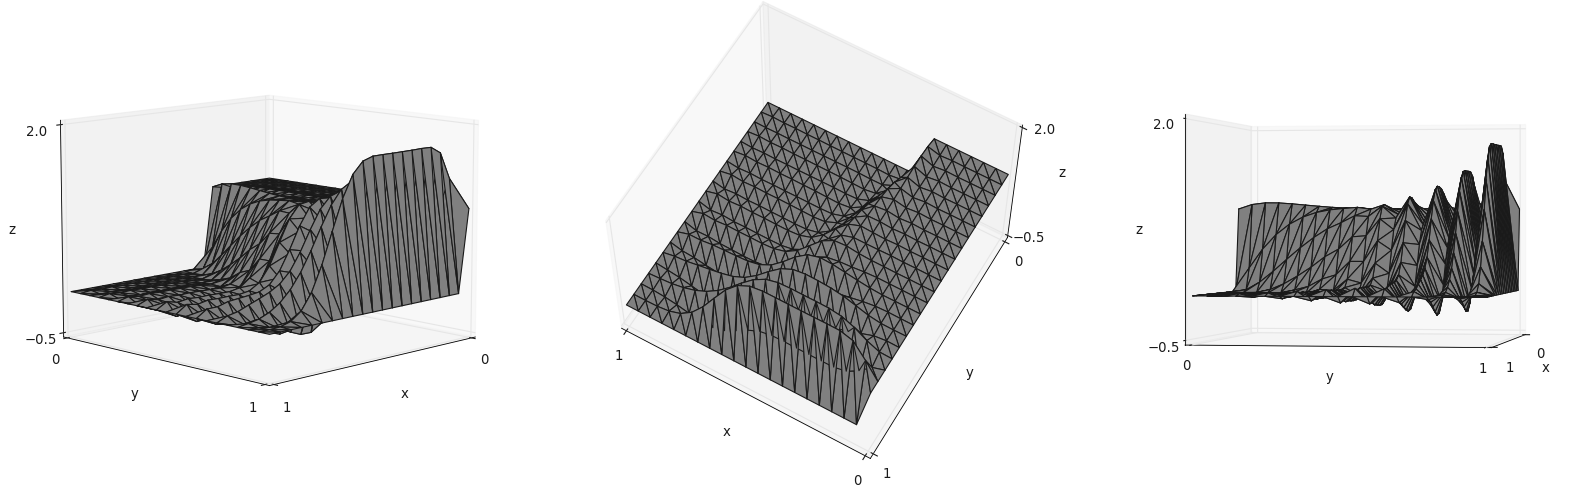

    Peclet_triangle  convec_flow  convergence  delta  diff  diff_flow error  \
23              NaN         1.27            0    0.0  0.01  -0.228616     0   

       h_max     h_min  id   method  num_diff_flow  penalty   residual_bc  \
23  0.070711  0.070711  23  lifting            0.0      NaN  1.730666e-15   

    residual_system  velocity_x  velocity_y  mass_balance  \
23        10.630856           1           3      1.041384   

    artificial_mass_balance  peclet_global  
23                 1.041384       5.555178  


In [16]:
# Display 3D- diff = 0.1; lambda diffusion = 0
display_results.plot_id(df_concentration_all, nodes, triangles, id = 23)
print(df_dim[(df_dim['id'] == 23)])

Total absolute derivatives: 202.87958650210174
Mean absolute derivatives: 0.4600444138369653


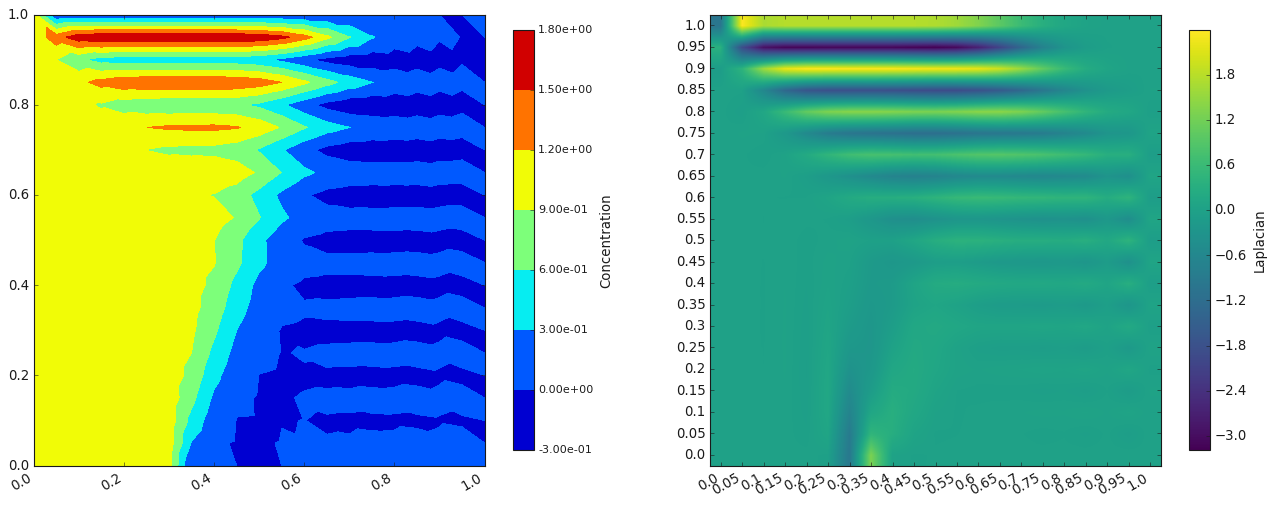

In [17]:
display_results.plot_idprofile(df_concentration_all, nodes, triangles, id = 23)

# Analysis Numerical diffusion

In [24]:
df_dim[(df_dim['diff'] == 0.01)&(df_dim['delta'] == 0.1)&(df_dim['method'] == 'lifting')]

,Peclet_triangle,convec_flow,convergence,delta,diff,diff_flow,error,h_max,h_min,id,method,num_diff_flow,penalty,residual_bc,residual_system,velocity_x,velocity_y,mass_balance,artificial_mass_balance,peclet_global
4583,11.18034,1.27,0,0.1,0.01,0.013541,0,0.070711,0.070711,4583,lifting,-1.63112,NaN,1.153778e-15,17.87728,1,3,1.283541,-0.347578,0.785124


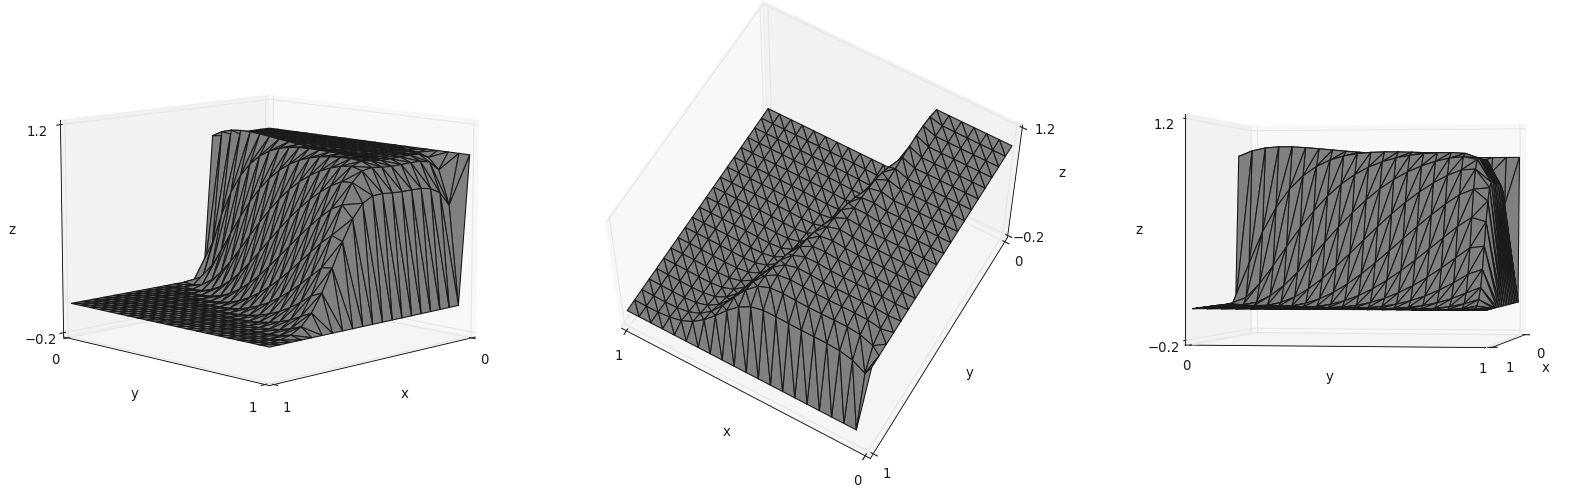

     Peclet_triangle  convec_flow  convergence  delta  diff  diff_flow error  \
479         11.18034         1.27            0   0.01  0.01  -0.097481     0   

        h_max     h_min   id   method  num_diff_flow  penalty   residual_bc  \
479  0.070711  0.070711  479  lifting      -1.015382      NaN  5.073506e-11   

     residual_system  velocity_x  velocity_y  mass_balance  \
479        10.732313           1           3      1.172519   

     artificial_mass_balance  peclet_global  
479                 0.157138       1.141201  


In [21]:
# Display 3D - diff = 0.01; lambda_diffusion = 0.001
display_results.plot_id(df_concentration_all, nodes, triangles, id = 479)
print(df_dim[(df_dim['id'] == 479)])

Total absolute derivatives: 38.42479937006913
Mean absolute derivatives: 0.0871310643312225


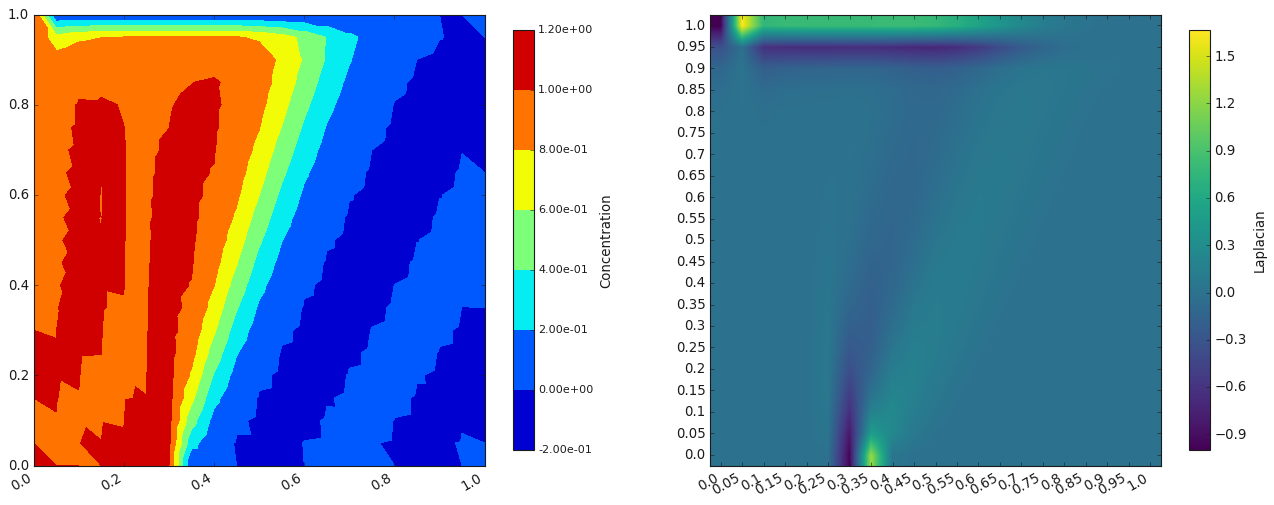

In [25]:
display_results.plot_idprofile(df_concentration_all, nodes, triangles, id = 479)

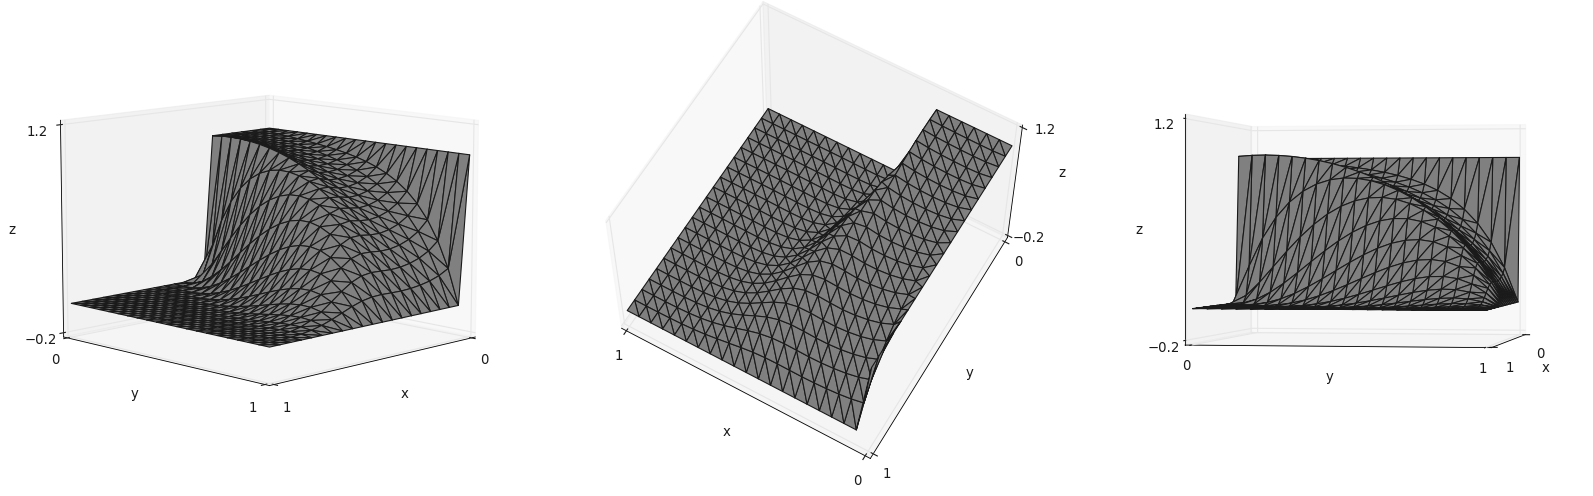

      Peclet_triangle  convec_flow  convergence  delta  diff  diff_flow error  \
4583         11.18034         1.27            0    0.1  0.01   0.013541     0   

         h_max     h_min    id   method  num_diff_flow  penalty   residual_bc  \
4583  0.070711  0.070711  4583  lifting       -1.63112      NaN  1.153778e-15   

      residual_system  velocity_x  velocity_y  mass_balance  \
4583         17.87728           1           3      1.283541   

      artificial_mass_balance  peclet_global  
4583                -0.347578       0.785124  


In [26]:
# Display 3D - diff = 0.01; lambda_diffusion = 0.1
display_results.plot_id(df_concentration_all, nodes, triangles, id = 4583)
print(df_dim[(df_dim['id'] == 4583)])

Total absolute derivatives: 23.814442086219586
Mean absolute derivatives: 0.05400100246308297


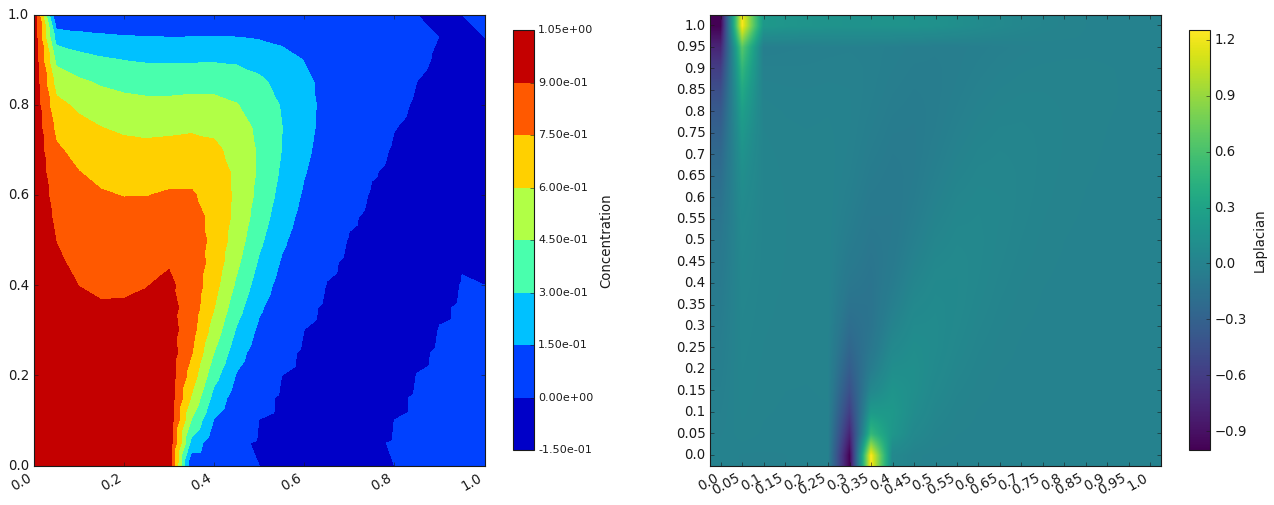

In [27]:
display_results.plot_idprofile(df_concentration_all, nodes, triangles, id = 4583)

# Analyse which value of diffusion the oscillation starts
- Diff = 0.07 starts oscillation

In [28]:
df_dim[(abs(df_dim['diff'] - 0.07) < 0.001)&(df_dim['delta']==0)]

,Peclet_triangle,convec_flow,convergence,delta,diff,diff_flow,error,h_max,h_min,id,method,num_diff_flow,penalty,residual_bc,residual_system,velocity_x,velocity_y,mass_balance,artificial_mass_balance,peclet_global
144,NaN,1.27,0,0.0,0.07,-0.871885,0,0.070711,0.070711,144,penalty,0.0,1.000000e+00,5.870028e+00,9.653901,1,3,0.398115,0.398115,1.456614
145,NaN,1.27,0,0.0,0.07,-0.917858,0,0.070711,0.070711,145,penalty,0.0,1.000000e+01,5.254285e+00,10.131762,1,3,0.352142,0.352142,1.383656
146,NaN,1.27,0,0.0,0.07,-0.921305,0,0.070711,0.070711,146,penalty,0.0,1.000000e+02,5.201885e+00,10.169168,1,3,0.348695,0.348695,1.378480
147,NaN,1.27,0,0.0,0.07,-0.921657,0,0.070711,0.070711,147,penalty,0.0,1.000000e+03,5.196725e+00,10.172969,1,3,0.348343,0.348343,1.377953
148,NaN,1.27,0,0.0,0.07,-0.921674,0,0.070711,0.070711,148,penalty,0.0,1.000000e+04,5.196210e+00,10.173188,1,3,0.348326,0.348326,1.377928
149,NaN,1.27,0,0.0,0.07,-0.921677,0,0.070711,0.070711,149,penalty,0.0,1.000000e+05,5.196158e+00,10.173224,1,3,0.348323,0.348323,1.377923
150,NaN,1.27,0,0.0,0.07,-0.921677,0,0.070711,0.070711,150,penalty,0.0,1.000000e+06,5.196153e+00,10.173228,1,3,0.348323,0.348323,1.377923
151,NaN,1.27,0,0.0,0.07,-0.921677,0,0.070711,0.070711,151,penalty,0.0,1.000000e+07,5.196152e+00,10.173228,1,3,0.348323,0.348323,1.377923
152,NaN,1.27,0,0.0,0.07,-0.921677,0,0.070711,0.070711,152,penalty,0.0,1.000000e+08,5.196152e+00,10.173228,1,3,0.348323,0.348323,1.377923
153,NaN,1.27,0,0.0,0.07,-0.921677,0,0.070711,0.070711,153,penalty,0.0,1.000000e+09,5.196152e+00,10.173228,1,3,0.348323,0.348323,1.377923


In [29]:
for id in df_dim['id'].unique():
    metric_id = display_results.metric_laplacian(df_concentration_all, nodes, id)
    df_dim.loc[df_dim['id'] == id, 'sum_laplacian'] = metric_id[0]
    df_dim.loc[df_dim['id'] == id, 'mean_laplacian'] = metric_id[1]

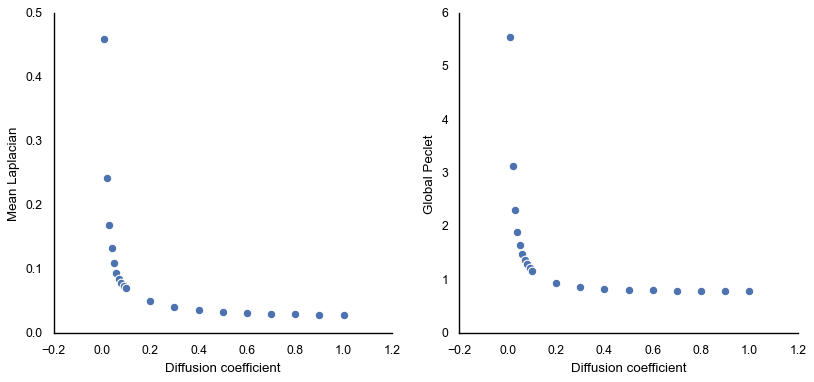

In [36]:
# Check for which diff the oscillations start
set_sns()
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].scatter(df_dim.loc[(df_dim['delta'] == 0) &(df_dim['method'] == 'lifting'), 'diff'],
            df_dim.loc[(df_dim['delta'] == 0) &(df_dim['method'] == 'lifting'),'mean_laplacian'],
            s = 60)
ax[0].set_xlabel('Diffusion coefficient')
ax[0].set_ylabel('Mean Laplacian')

ax[1].scatter(df_dim.loc[(df_dim['delta'] == 0) &(df_dim['method'] == 'lifting'), 'diff'],
            df_dim.loc[(df_dim['delta'] == 0) &(df_dim['method'] == 'lifting'),'peclet_global'],
            s = 60)
ax[1].set_xlabel('Diffusion coefficient')
ax[1].set_ylabel('Global Peclet')

fig.set_facecolor('white')
display_results.save_fig('peclet_global_laplacian')

In [106]:
df_dim[(abs(df_dim['diff'] - 0.07) <0.001)&(df_dim['delta'] == 0)&(df_dim['method'] == 'lifting')]

,Peclet_triangle,convec_flow,convergence,delta,diff,diff_flow,error,h_max,h_min,id,...,penalty,residual_bc,residual_system,velocity_x,velocity_y,mass_balance,artificial_mass_balance,peclet_global,sum_laplacian,mean_laplacian
167,NaN,1.27,0,0.0,0.07,-0.921677,0,0.070711,0.070711,167,...,NaN,8.453152e-11,10.173226,1,3,0.348323,0.348323,1.377923,37.176964,0.084302


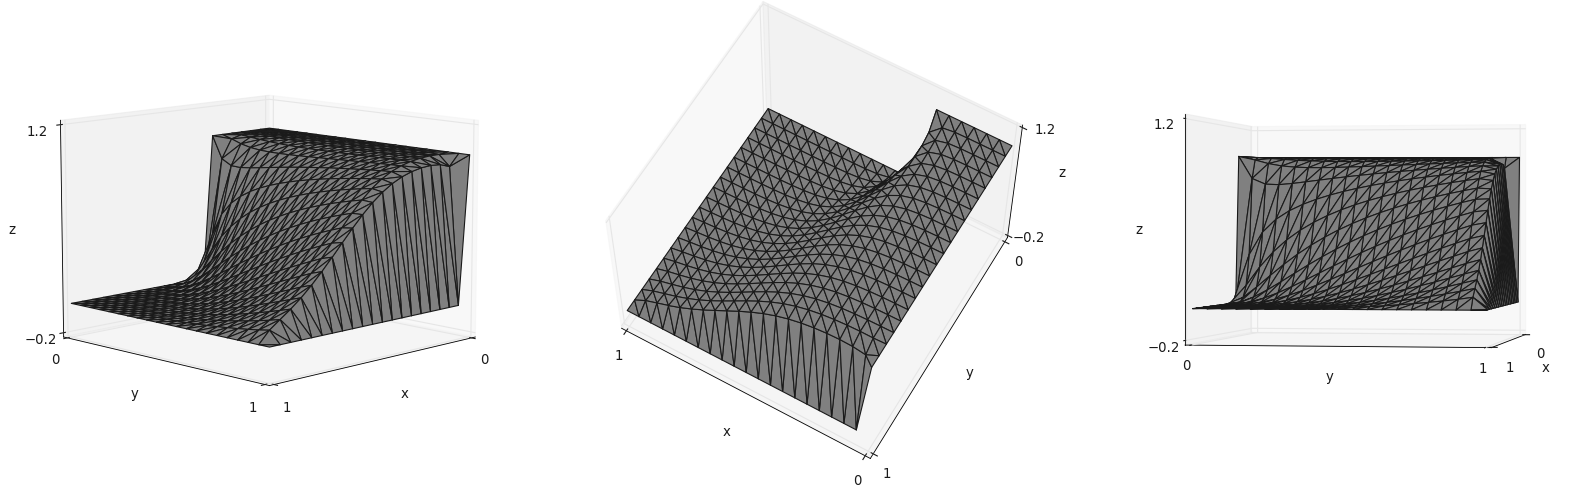

     Peclet_triangle  convec_flow  convergence  delta  diff  diff_flow error  \
191              NaN         1.27            0    0.0  0.08  -0.983714     0   

        h_max     h_min   id  ... penalty   residual_bc  residual_system  \
191  0.070711  0.070711  191  ...     NaN  2.786938e-10        10.195509   

     velocity_x  velocity_y  mass_balance  artificial_mass_balance  \
191           1           3      0.286286                 0.286286   

     peclet_global  sum_laplacian  mean_laplacian  
191       1.291026      34.348452        0.077888  

[1 rows x 22 columns]


In [51]:
# Display 3D - diff = 0.1; lambda_diffusion = 0
display_results.plot_id(df_concentration_all, nodes, triangles, id = 191)
print(df_dim[(df_dim['id'] == 191)])

Total absolute derivatives: 34.34845192394358
Mean absolute derivatives: 0.07788764608603985


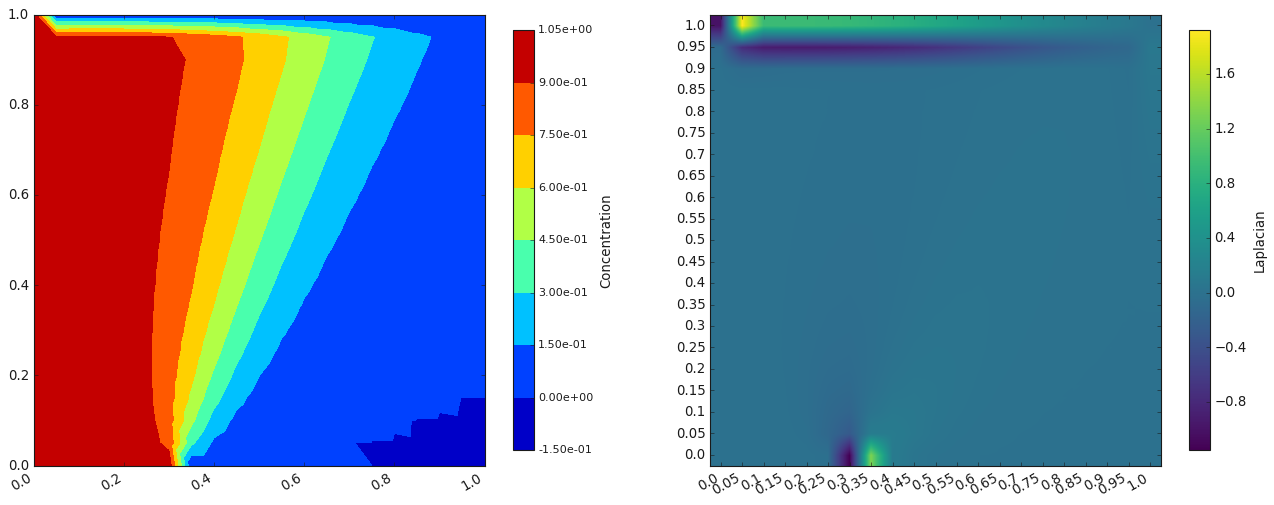

In [52]:
display_results.plot_idprofile(df_concentration_all, nodes, triangles, id = 191)

# Mass balance
- Numerical vs 'real' diffusion

In [60]:
df_dim.loc[(df_dim['diff'] == 0.01)&(df_dim['delta'] == 0.02)&(df_dim['method'] == 'lifting'), ['mass_balance',
                                                                                          'artificial_mass_balance']]

,mass_balance,artificial_mass_balance
935,1.213787,-0.08613


In [59]:
df_dim.loc[(df_dim['diff'] == 0.01)&(df_dim['method'] == 'lifting'), ['mass_balance',
                                                                                          'artificial_mass_balance']]

,mass_balance,artificial_mass_balance
23,1.041384,1.041384
479,1.172519,0.157138
935,1.213787,-0.086130
1391,1.235302,-0.194511
1847,1.249011,-0.253179
2303,1.258725,-0.288327
2759,1.266056,-0.310681
3215,1.271816,-0.325476
3671,1.276471,-0.335558
4127,1.280314,-0.342587


In [68]:
df_dim.columns

Index(['Peclet_triangle', 'convec_flow', 'convergence', 'delta', 'diff',
       'diff_flow', 'error', 'h_max', 'h_min', 'id', 'method', 'num_diff_flow',
       'penalty', 'residual_bc', 'residual_system', 'velocity_x', 'velocity_y',
       'mass_balance', 'artificial_mass_balance', 'peclet_global',
       'sum_laplacian', 'mean_laplacian'],
      dtype='object')

In [72]:
df_dim.loc[(df_dim['diff'] == diff)&(df_dim['method'] == 'lifting'), ['delta', 'convec_flow',
                                                                      'diff_flow', 'num_diff_flow',
                                                                      'mass_balance', 'artificial_mass_balance']]

,delta,convec_flow,diff_flow,num_diff_flow,mass_balance,artificial_mass_balance
23,0.00,1.27,-0.228616,0.000000,1.041384,1.041384
479,0.01,1.27,-0.097481,-1.015382,1.172519,0.157138
935,0.02,1.27,-0.056213,-1.299917,1.213787,-0.086130
1391,0.03,1.27,-0.034698,-1.429813,1.235302,-0.194511
1847,0.04,1.27,-0.020989,-1.502190,1.249011,-0.253179
2303,0.05,1.27,-0.011275,-1.547053,1.258725,-0.288327
2759,0.06,1.27,-0.003944,-1.576737,1.266056,-0.310681
3215,0.07,1.27,0.001816,-1.597291,1.271816,-0.325476
3671,0.08,1.27,0.006471,-1.612029,1.276471,-0.335558
4127,0.09,1.27,0.010314,-1.622902,1.280314,-0.342587


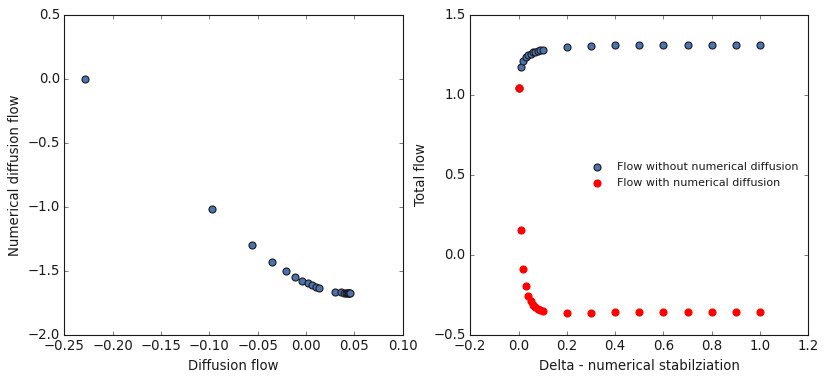

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

diff = 0.01
ax[0].scatter(df_dim.loc[(df_dim['diff'] == diff)&(df_dim['method'] == 'lifting'), 'diff_flow'],
            df_dim.loc[(df_dim['diff'] == diff)&(df_dim['method'] == 'lifting'),'num_diff_flow'],
            s = 40)
ax[0].set_ylabel('Numerical diffusion flow')
ax[0].set_xlabel('Diffusion flow')


ax[1].scatter(df_dim.loc[(df_dim['diff'] == diff)&(df_dim['method'] == 'lifting'), 'delta'],
            df_dim.loc[(df_dim['diff'] == diff)&(df_dim['method'] == 'lifting'),'mass_balance'],
            label = 'Flow without numerical diffusion',
            s = 40)

ax[1].scatter(df_dim.loc[(df_dim['diff'] == diff)&(df_dim['method'] == 'lifting'), 'delta'],
            df_dim.loc[(df_dim['diff'] == diff)&(df_dim['method'] == 'lifting'),'artificial_mass_balance'],
            color = 'red',
            label = 'Flow with numerical diffusion',
            s = 40)
ax[1].set_xlabel('Delta - numerical stabilziation')
ax[1].set_ylabel('Total flow')
ax[1].legend(fontsize='small', loc='center right', frameon = False, scatterpoints=1)
fig.set_facecolor('white')

display_results.save_fig('mass_balance')